# Evaluation of a Company’s Expenditure on Salaries

An analysis using a data set from Kaggle, IBM_HR_Data 

Depending on the sector of your business, you may spend between 40 to 80 percent of gross revenues on employee salaries and benefits combined. Salaries alone can account for 18 to 52 percent of your operating budget,
according to the Society for Human Resource Management.

_Understanding how over 50% of this income is spent is key_

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from patsy import dmatrices
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline


# 1.Business Understanding
We use the dataset to answer the following questions.

* How is over 50% of the company’s gross income spent?
* Is it worth it?
* What can a starting employee expect in the next few years or so?


# 2.Data Understanding
In this section of the report, we will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

In [3]:

df = pd.read_csv('./dataset_IBM_HR_Data.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [2]:
df.describe()
"""Taking a closer look at the data"""

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


'to look at the correlation in the data'

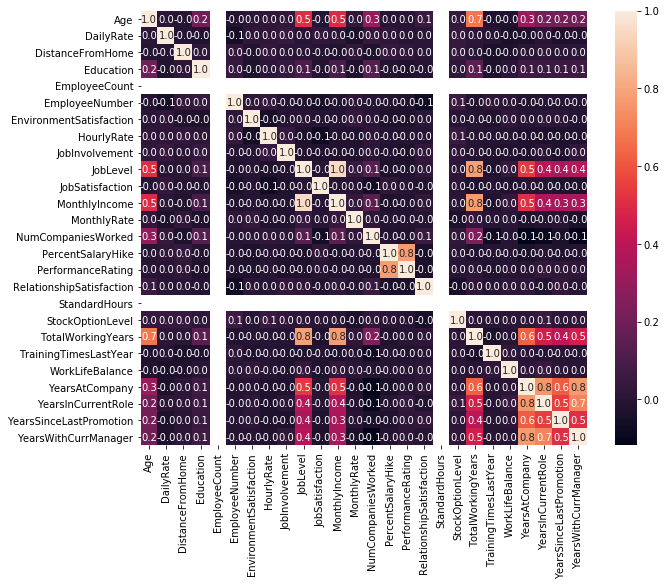

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot = True, fmt = '.1f');
"""to look at the correlation in the data"""

# 3.Prepare Data
This includes cleaning data, working with missing values and dropping columns that are not to be used

In [6]:
#dealing with missing values
#nan = df.isnull().sum(axis=0).
#since the above code returns a list, we use this;

df.columns[np.sum(df.isnull()) ==0]
"""Returns the sum of columns with NaNs"""

#this tells us that there are no missing values in our dataset however,
#if it had missing values then we would have handled our data like this

   
num_vars = df.select_dtypes(include = ['float', 'int']).columns
for col in num_vars:
    df[col].fillna((df[col].mean()), inplace = True)
    """Returns the mean of the column with missing numbers and replaces it with the NaN values"""
    
cat_vars = df.select_dtypes(include = ['object']).copy().columns
for var in cat_vars:
     df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
        """Converts categorical variable into dummy/indicator variables"""


# 4.Data Modeling

To answer our first question we do so by inspecting data by relationships between categorical values, 
numerical values and categorical and numerical values
plot matrices

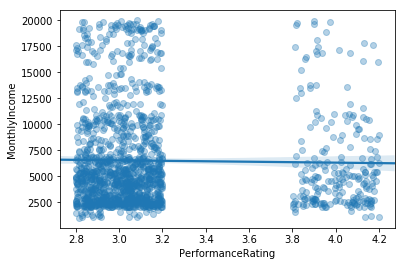

In [28]:

sns.regplot(data = df, x = 'PerformanceRating', y = 'MonthlyIncome', x_jitter = 0.2, y_jitter = 0.2, 
            scatter_kws = {'alpha' : 1/3})

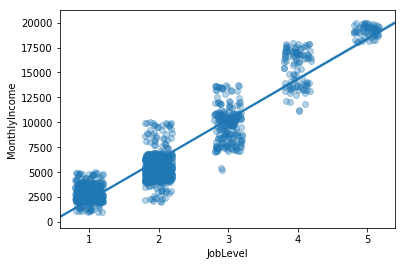

In [33]:
sns.regplot(data = df, x = 'JobLevel', y = 'MonthlyIncome', x_jitter = 0.2, y_jitter = 0.2, 
            scatter_kws = {'alpha' : 1/3})
#because the high amount of overlap in points makes it difficult to see the actual relationship between the plotted variables use 
#use transparency and jitter

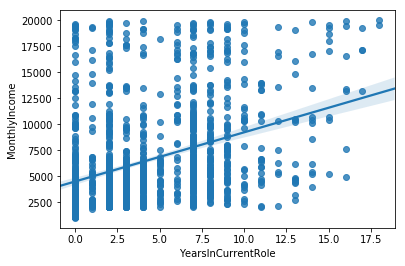

In [19]:
sns.regplot(data = df, x = 'YearsInCurrentRole', y = 'MonthlyIncome')

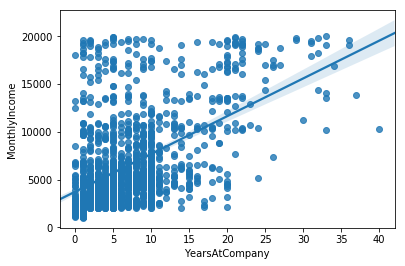

In [12]:
sns.regplot(data = df, x = 'YearsAtCompany', y = 'MonthlyIncome')

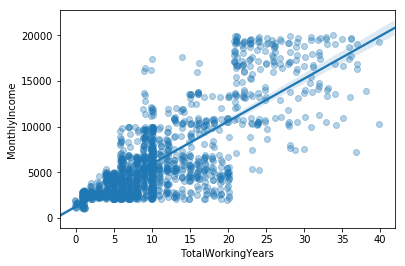

In [45]:
sns.regplot(data = df, x = 'TotalWorkingYears', y = 'MonthlyIncome', x_jitter = 0.2, y_jitter = 0.2, 
            scatter_kws = {'alpha' : 1/3})

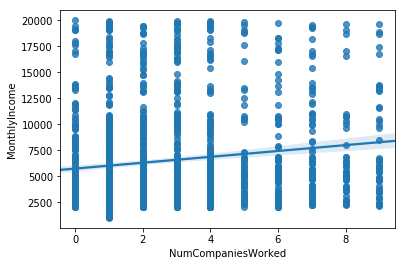

In [14]:
sns.regplot(data = df, x = 'NumCompaniesWorked', y = 'MonthlyIncome')

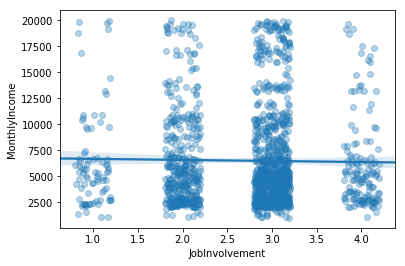

In [30]:
sns.regplot(data = df, x = 'JobInvolvement', y = 'MonthlyIncome', x_jitter = 0.2, y_jitter = 0.2, 
            scatter_kws = {'alpha' : 1/3})

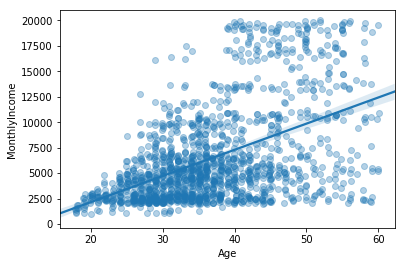

In [38]:
sns.regplot(data = df, x = 'Age', y = 'MonthlyIncome', x_jitter = 0.2, y_jitter = 0.2, 
            scatter_kws = {'alpha' : 1/3})

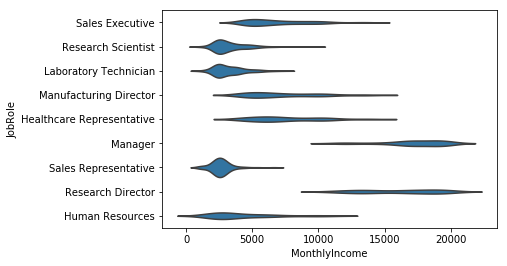

In [37]:
#sns.violinplot(data = df, x = 'JobRole', y = 'MonthlyIncome')
base_color = sns.color_palette()[0]
sns.violinplot(data = df, x = 'MonthlyIncome', y = 'JobRole', color = base_color, inner = None)

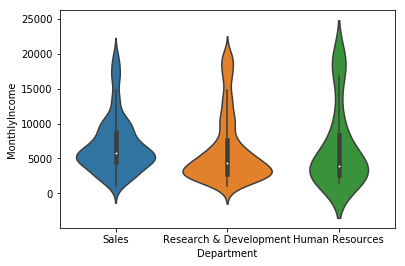

In [31]:
#salaries by department
sns.violinplot(data = df, x = 'Department', y = 'MonthlyIncome')


**The above visualizations suggest that the time one takes at their work place and the monthly income is positively correlated 
meaning this one of the major factors that affect salary as seen from above.**

*This therefore means that a larger portion of the company's income is spent on compensating individuals majorly based on lenghth of time spent at the work place.*

Question 2

**Is the expenditure worth it?**

In [16]:
#to answer the 2nd question, we group data and sort it by the monthlyincome. below are the observations.

df_cat_vars = df[['MonthlyIncome','YearsInCurrentRole','Age','PerformanceRating']]
df_cat_vars.groupby(['MonthlyIncome','PerformanceRating']).mean().sort_values('MonthlyIncome', ascending = False)
df_cat_vars.head(15)

,MonthlyIncome,YearsInCurrentRole,Age,PerformanceRating
0,5993,4,41,3
1,5130,7,49,4
2,2090,0,37,3
3,2909,7,33,3
4,3468,2,27,3
5,3068,7,32,3
6,2670,0,59,4
7,2693,0,30,4
8,9526,7,38,4
9,5237,7,36,3


In [18]:
df['count'] = 1 

df_cat_vars = pd.DataFrame(df[['TotalWorkingYears', 'MonthlyIncome','YearsInCurrentRole','Age', 'YearsAtCompany',
                  'JobLevel', 'PerformanceRating','PercentSalaryHike','TrainingTimesLastYear']])

highly_paid = df_cat_vars.groupby(['TotalWorkingYears', 'MonthlyIncome','YearsInCurrentRole','Age']).sum().sort_values ('MonthlyIncome', ascending = False)
highly_paid.head(15)
#df_cat_vars.head(5)

,,,,YearsAtCompany,JobLevel,PerformanceRating,PercentSalaryHike,TrainingTimesLastYear
TotalWorkingYears,MonthlyIncome,YearsInCurrentRole,Age,,,,,
34,19999,18,52,33,5,3,14,5
21,19973,16,41,21,5,4,22,3
28,19943,2,56,5,5,3,13,2
21,19926,4,50,5,5,3,15,5
24,19859,2,55,5,5,3,13,2
31,19847,10,51,29,5,4,24,5
33,19845,14,52,32,5,3,15,3
21,19833,8,40,21,5,3,14,3
25,19740,7,43,8,5,3,14,2


From the tables above, we are able to clearly see that individuals with the highest salary generally have the following aspects 
* considerable workingtime and a high job level which depicts expertise(experience) and knowledge.

**What can i expect in the next few years or so?**
Predicting salary using linear regression. we now move on to predict the salary based on the explanatory variables 

In [40]:

df['intercept'] = 1
lm = sm.OLS(df['MonthlyIncome'], df[['intercept', 'JobInvolvement','JobSatisfaction', 'TotalWorkingYears', 'YearsAtCompany',
                                     'YearsInCurrentRole', 'PerformanceRating', 'JobLevel', 'WorkLifeBalance']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          MonthlyIncome   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     1756.
Date:                Sat, 18 Jul 2020   Prob (F-statistic):               0.00
Time:                        21:48:18   Log-Likelihood:                -12781.
No. Observations:                1470   AIC:                         2.558e+04
Df Residuals:                    1461   BIC:                         2.563e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercept          -1726.4602    415.211     -4.158      0.000   -2540.934    -911.986
JobInvolvement       -21.9558     53.238     -0.412      0.680    -126.386      82.474
JobSatisfaction      -16.5894     34.315     -0.483      0.629     -83.902      50.723
TotalWorkingYears     50.9293      8.524      5.974      0.000      34.208      67.651
YearsAtCompany         1.9676     10.866      0.181      0.856     -19.348      23.283
YearsInCurrentRole   -31.8077     16.094     -1.976      0.048     -63.378      -0.237
PerformanceRating     26.3910    105.063      0.251      0.802    -179.699     232.481
JobLevel            3796.7594     55.210     68.769      0.000    3688.459    3905.059
WorkLifeBalance      -14.0040     53.740     -0.261      0.794    -119.420      91.412
==============================================================================
Omnibus:                        9.558   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               12.984
Skew:                          -0.035   Prob(JB):                      0.00152
Kurtosis:                       3.455   Cond. No.                         198.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
#in the above case we found the Rsquared. This is a statistical measure that represents the proportion of the variance for a dependent(response) variable 
#that's explained by an independent(explanatory) variables in the regression model. 

**What is the fastest way to increase my salary?**

In [23]:

# Consider only the numeric variables
X = df[['JobLevel', 'TotalWorkingYears', 'YearsAtCompany','YearsInCurrentRole', 'WorkLifeBalance','Age']]
y = df['MonthlyIncome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

#this includes:

lm_model = LinearRegression(normalize=True)
"""Instantiating"""

lm_model.fit(X_train, y_train) 
"""Fitting the model"""


y_test_predict = lm_model.predict(X_test)
required_score = r2_score(y_test, y_test_predict)
length_y_test = len(y_test_predict)
"""To Predict and score"""

"The Rsquared score for the model is {} values".format(required_score)


'The Rsquared score for the model is 0.895137395171488 values'

# Evaluate the Results
Rsquared evaluates the scatter of the data points around the fitted regression line.

Rsquared is the percentage of the dependent variable variation that a linear model explains.

Our Rsquared of approximately 90% represents a model that explains any of the variation in the response variable around its 
mean. 
**We can therefore answer the last question by suggesting to the young aspirant to focus on the our X_variables.**
